# Gradient Boosting Modeling

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Importing the Data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')
df

,Tournament,Club,Player,Number,Date,Market_value,Nation,Pos,Position,Age,...,Passes_through_balls,Passes_Switches,Passes_crosses,Passes_throw-Ins_taken,Corner_kicks,Corner_Kicks_In,Corner_Kicks_Out,Corner_Kicks_Straight,Passes_offside,Passes_blocked
0,Laliga,Ca Osasuna,Nano,23.0,2018-05-30,50000,es ESP,FW,Forward,25,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.0,0.100000,0.500000
1,Laliga,Rcd Mallorca,Alejandro Alfaro,32.0,2019-09-10,300000,es ESP,CM,Midfielder,20,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Bundesliga,Bayer 04 Leverkusen,Paulinho,15.0,2022-11-09,7000000,br BRA,LM,Midfielder,29,...,0.058824,0.058824,0.088235,0.088235,0.000000,0.000000,0.000000,0.0,0.147059,0.500000
3,Premier League,Fc Liverpool,Fabinho,3.0,2022-11-03,55000000,br BRA,CM,Midfielder,28,...,0.122699,0.288344,0.239264,0.147239,0.000000,0.000000,0.000000,0.0,0.098160,0.472393
4,Serie A,Chievo Verona,Mamadou Samassa,30.0,2020-02-11,100000,ml MLI,GK,Goal Keeper,27,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.238095,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Laliga,Real Sociedad San Sebastian,Robin Le Normand,24.0,2022-11-07,35000000,fr FRA,CB,Defender,25,...,0.008621,0.284483,0.025862,0.103448,0.000000,0.000000,0.000000,0.0,0.112069,0.224138
3481,Laliga,Real Sociedad San Sebastian,Ander Guevara,16.0,2022-11-07,5000000,es ESP,CB,Defender,25,...,0.059701,0.208955,0.074627,0.029851,0.000000,0.000000,0.000000,0.0,0.179104,0.567164
3482,Laliga,Fc Villarreal,Alfonso Pedraza,24.0,2022-11-07,18000000,es ESP,LB,Defender,26,...,0.025806,0.109677,2.909677,4.890323,0.006452,0.000000,0.006452,0.0,0.154839,1.716129
3483,Laliga,Real Sociedad San Sebastian,Jon Pacheco,20.0,2022-11-07,6000000,es ESP,CB,Defender,21,...,0.000000,0.285714,0.047619,0.238095,0.000000,0.000000,0.000000,0.0,0.190476,0.285714


# Separating Data by Position

In [26]:
forward = df[df['Position']=='Forward']
midfield = df[df['Position']=='Midfielder']
defence = df[df['Position']=='Defender']
gk = pd.read_csv('final_gk.csv')

# Gradient Boosting Regressor with all Features and Default Hyperparameters

In [27]:
X = forward.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)
y = forward['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [28]:
#Pre-processing data

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)


#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

In [29]:
#Initiating GradientBoostingRegressor to calculate feature importance
gbt = GradientBoostingRegressor()
gbt.fit(X_train_scaled,y_train)

GradientBoostingRegressor()

In [30]:
cross_val_train = cross_val_score(gbt, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(gbt, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

In [31]:
#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

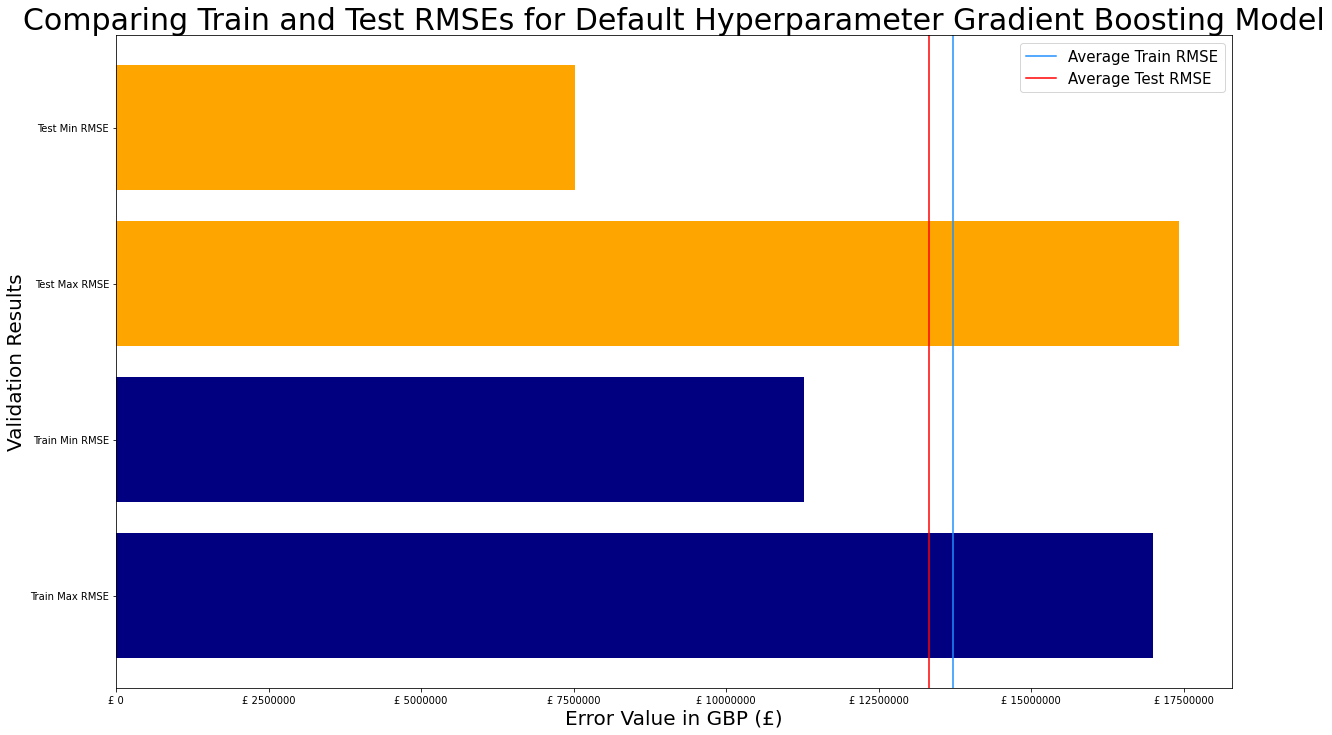

In [32]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Gradient Boosting Model',fontsize=30)
ax.legend(fontsize=15)

# Hyperparameter Tuning. (Finding  Hyperparameters that may improve our model performance)

Since a GridSearch would take a long time to run with all our features, we will perform a GridSearch for a model that would only take the top 10 most important features.

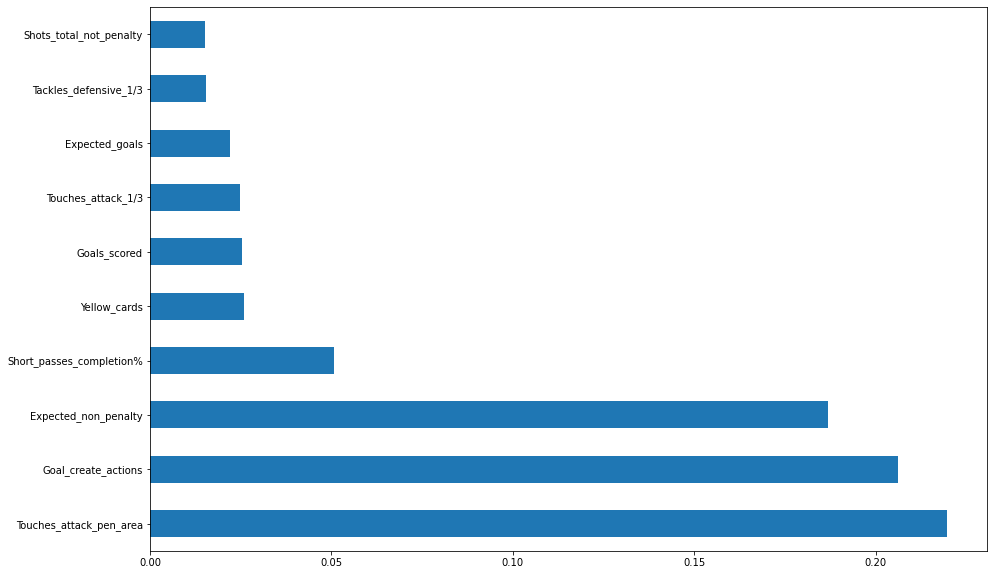

In [33]:
# print the features importance.

fig,ax = plt.subplots(figsize=(15,10))

feat_importances = pd.Series(gbt.feature_importances_, index=X_train.columns)

feat_importances.nlargest(10).plot(kind='barh')

plt.show()

In [34]:
#Creating a list of top features
top_features = list(feat_importances.nlargest(10).keys())

## Building a newer model. This time only with important features

In [35]:
X = forward.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)[top_features]
y = forward['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

In [37]:
# Create the parameter grid based on the results of random search 
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.5],
              'subsample'    : [0.9, 0.7, 0.5, 0.3, 0.1],
              'n_estimators' : [100,200,300,400,500],
              'max_depth'    : [2,4,6,8,10]
             }

In [38]:
# Instantiate the grid search
grid_search = GridSearchCV(estimator = gbt, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [39]:

grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.5],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.9, 0.7, 0.5, 0.3, 0.1]},
             verbose=2)

In [40]:
grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.9}

# Using a Gradient Boosting Regressor with important features and better Parameters

In [41]:
param_values = list((grid_search.best_params_).values())

In [42]:
param_values

[0.02, 2, 300, 0.9]

In [43]:
# Traning model with all features using best Gradient Boosting Hyperparameters
gbt_Grid = GradientBoostingRegressor(learning_rate=param_values[0],
                                 max_depth=param_values[1],
                                 n_estimators=param_values[2],
                                 subsample=param_values[3])

gbt_Grid.fit(X_train_scaled,y_train);

In [44]:
cross_val_train = cross_val_score(gbt_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(gbt_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

In [45]:
#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

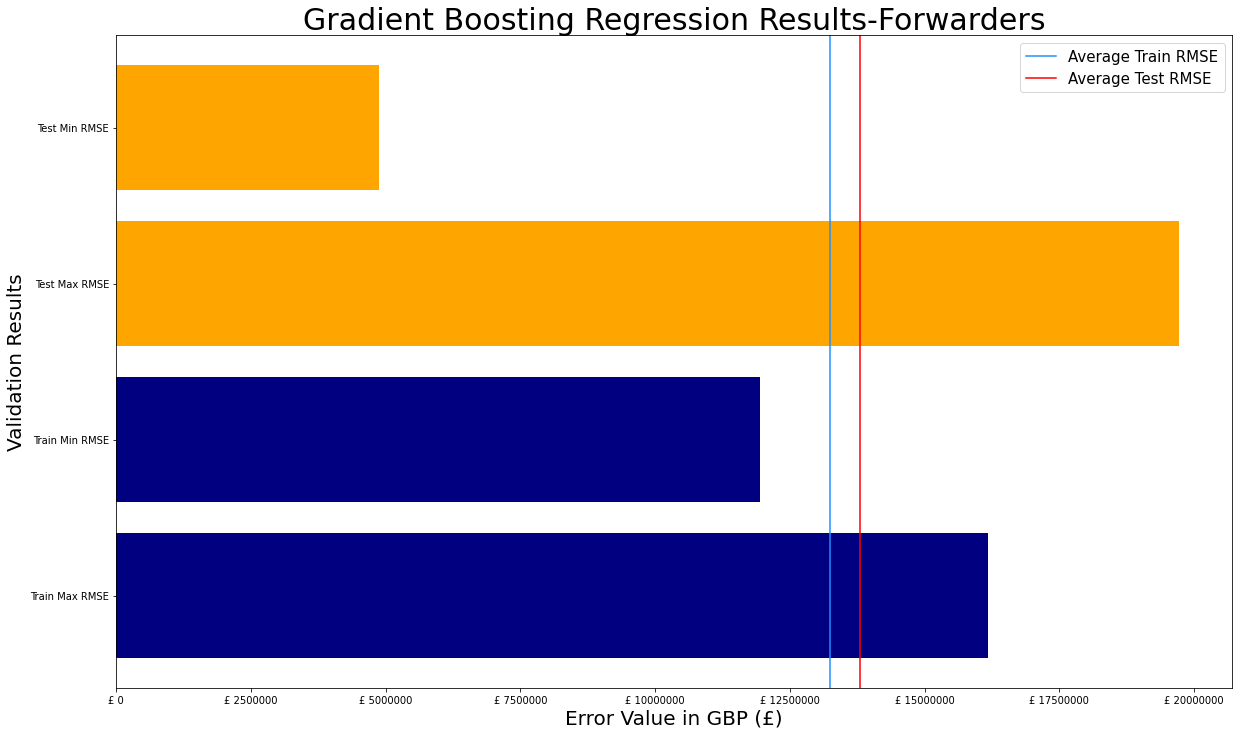

In [46]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results_att.iloc[0][2],(round(results_att.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_att.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_att.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_att.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_att.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_att.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_att.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Gradient Boosting Regression Results-Forwarders',fontsize=30)
ax.legend(fontsize=15);

# Applying the above workflow for Midfielders

In [49]:
X = midfield.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)
y = midfield['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#Fitting data into first Gradient Boosting Model to get important features

#Initiating GradientBoostingRegressor
gbt = GradientBoostingRegressor()

gbt.fit(X_train_scaled,y_train)

############################################################################

#Extracting Most Important Features

feat_importances = pd.Series(gbt.feature_importances_, index=X_train.columns)

#Creating a list of top features
top_features = list(feat_importances.nlargest(10).keys())

############################################################################

#Repeating Workflow. This time only with most important features.

#This is because of computational constraints from GridSearching over 500 features.

X = midfield.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)[top_features]
y = midfield['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)


############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#GridSearching improved hyperparameters

# Hyper parameters range intialization for tuning 

# Create the parameter grid based on the results of random search 
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.5],
              'subsample'    : [0.9, 0.7, 0.5, 0.3, 0.1],
              'n_estimators' : [100,200,300,400,500],
              'max_depth'    : [2,4,6,8,10]
             }

grid_search=GridSearchCV(gbt,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=5)

grid_search.fit(X_train_scaled,y_train)


#Extracting the best Parameters
param_values = list((grid_search.best_params_).values())

############################################################################
#Initiating a new Gradient Boosting Regressor

# Traning model with all features using best Gradient Boosting Hyperparameters
gbt_Grid = GradientBoostingRegressor(learning_rate=param_values[0],
                                 max_depth=param_values[1],
                                 n_estimators=param_values[2],
                                 subsample=param_values[3])

gbt_Grid.fit(X_train_scaled,y_train)


cross_val_train = cross_val_score(gbt_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(gbt_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-11421639.105 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-8555950.686 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-11608659.525 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-11402835.937 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-11013645.549 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-11284839.123 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-8382356.360 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-11388525.365 total

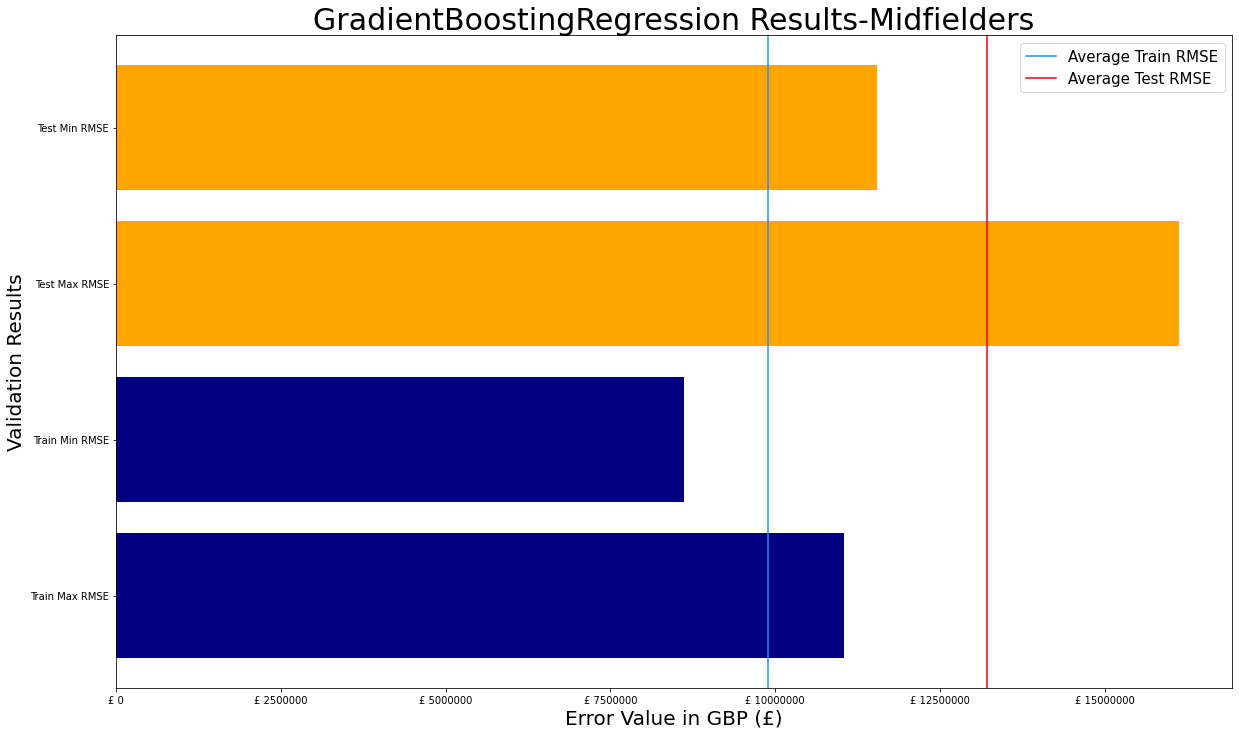

In [50]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([int(results_mid.iloc[0][2]),(round(results_mid.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_mid.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_mid.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_mid.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_mid.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_mid.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_mid.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('GradientBoostingRegression Results-Midfielders',fontsize=30)
ax.legend(fontsize=15);

# Applying the above workflow for Defenders

In [51]:
X = defence.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)
y = defence['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#Fitting data into first Gradient Boosting Model to get important features

#Initiating GradientBoostingRegressor
gbt = GradientBoostingRegressor()

gbt.fit(X_train_scaled,y_train);

############################################################################

#Extracting Most Important Features

feat_importances = pd.Series(gbt.feature_importances_, index=X_train.columns)

#Creating a list of top features
top_features = list(feat_importances.nlargest(10).keys())

############################################################################

#Repeating Workflow. This time only with most important features.

#This is because of computational constraints from GridSearching over 500 features.

X = forward.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)[top_features]
y = forward['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)


############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#GridSearching improved hyperparameters

# Hyper parameters range intialization for tuning 

# Create the parameter grid based on the results of random search 
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.5],
              'subsample'    : [0.9, 0.7, 0.5, 0.3, 0.1],
              'n_estimators' : [100,200,300,400,500],
              'max_depth'    : [2,4,6,8,10]
             }

grid_search=GridSearchCV(gbt,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=5)

grid_search.fit(X_train_scaled,y_train)


#Extracting the best Parameters
param_values = list((grid_search.best_params_).values())

############################################################################
#Initiating a new Gradient Boosting Regressor

# Traning model with all features using best Gradient Boosting Hyperparameters
gbt_Grid = GradientBoostingRegressor(learning_rate=param_values[0],
                                 max_depth=param_values[1],
                                 n_estimators=param_values[2],
                                 subsample=param_values[3])

gbt_Grid.fit(X_train_scaled,y_train)


cross_val_train = cross_val_score(gbt_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(gbt_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-9635515.363 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-13893596.963 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-15103667.868 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-12544108.401 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-15453149.813 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-9947038.721 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-13847620.496 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-15064356.262 total

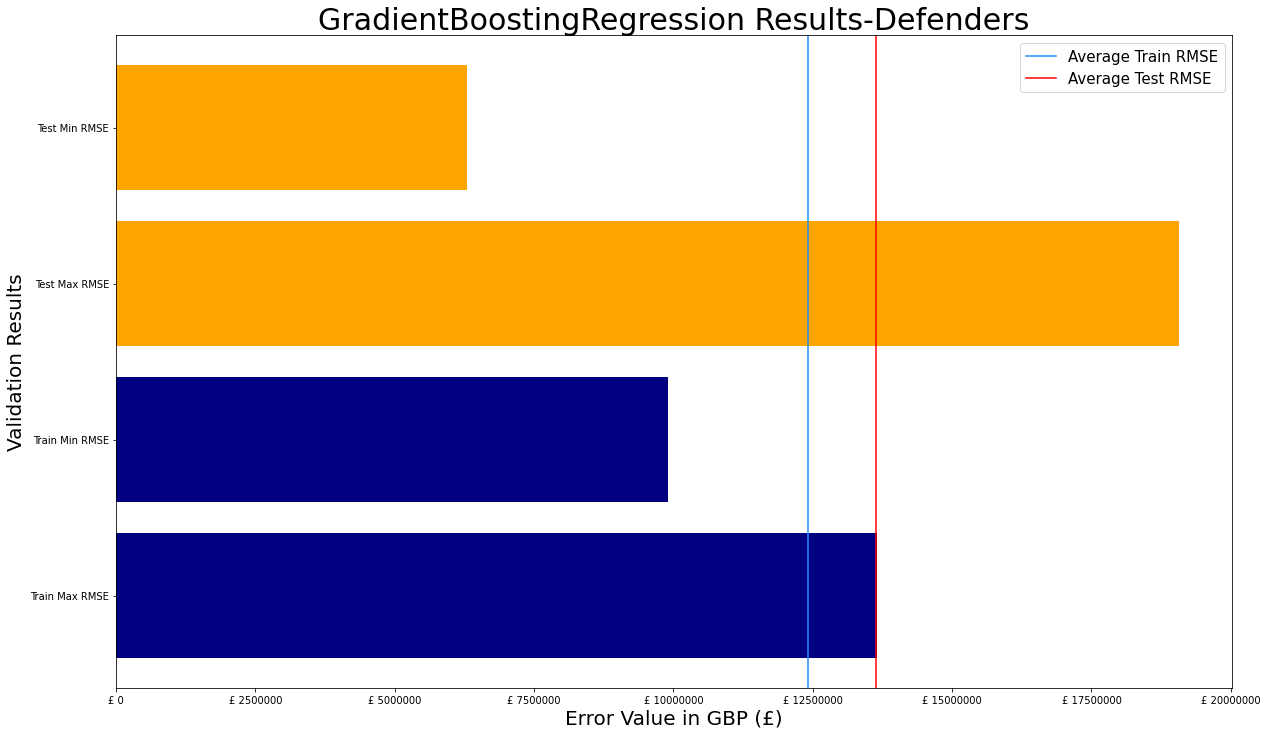

In [52]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results_def.iloc[0][2],(round(results_def.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_def.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_def.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_def.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_def.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_def.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_def.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('GradientBoostingRegression Results-Defenders',fontsize=30)
ax.legend(fontsize=15)

In [53]:
X = gk.drop(['Tournament','Player','Nation','Age','Market_value'],axis=1)
y = gk['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#Fitting data into first Gradient Boosting Model to get important features

#Initiating GradientBoostingRegressor
gbt = GradientBoostingRegressor()

gbt.fit(X_train_scaled,y_train);

############################################################################

#Extracting Most Important Features

feat_importances = pd.Series(gbt.feature_importances_, index=X_train.columns)

#Creating a list of top features
top_features = list(feat_importances.nlargest(10).keys())

############################################################################

#Repeating Workflow. This time only with most important features.

#This is because of computational constraints from GridSearching over 500 features.

X = gk.drop(['Tournament','Player','Nation','Age','Market_value'],axis=1)[top_features]
y = gk['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)


############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#GridSearching improved hyperparameters

# Hyper parameters range intialization for tuning 

# Create the parameter grid based on the results of random search 
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.5],
              'subsample'    : [0.9, 0.7, 0.5, 0.3, 0.1],
              'n_estimators' : [100,200,300,400,500],
              'max_depth'    : [2,4,6,8,10]
             }

grid_search=GridSearchCV(gbt,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=5)

grid_search.fit(X_train_scaled,y_train)


#Extracting the best Parameters
param_values = list((grid_search.best_params_).values())

############################################################################
#Initiating a new Gradient Boosting Regressor

# Traning model with all features using best Gradient Boosting Hyperparameters
gbt_Grid = GradientBoostingRegressor(learning_rate=param_values[0],
                                 max_depth=param_values[1],
                                 n_estimators=param_values[2],
                                 subsample=param_values[3])

gbt_Grid.fit(X_train_scaled,y_train)


cross_val_train = cross_val_score(gbt_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(gbt_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_gk = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_gk.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_gk.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-9125333.002 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-6504741.110 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-6164574.963 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-10606421.232 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.9;, score=-10617155.083 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-9308403.761 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-6580460.630 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7;, score=-5996469.176 total tim

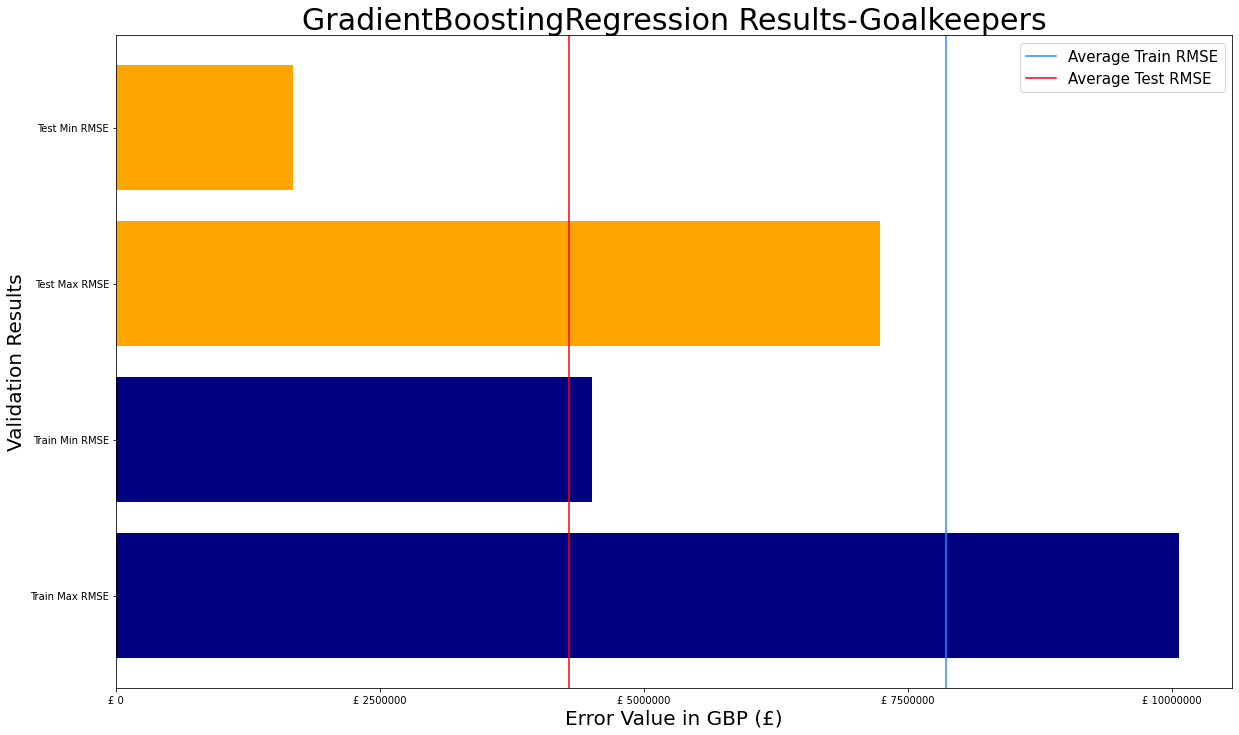

In [55]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([int(results_gk.iloc[0][2]),(round(results_gk.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_gk.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_gk.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_gk.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_gk.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_gk.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_gk.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('GradientBoostingRegression Results-Goalkeepers',fontsize=30)
ax.legend(fontsize=15)

# Comparing Model Performance for all three Positions

### Attackers

In [56]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,13236657.95,16180382.82,11954363.03
1,Test,13809271.90,19719557.42,4871235.90


### Midfielders

In [57]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,9889324.38,11050958.11,8611749.37
1,Test,13207237.91,16126235.07,11550288.09


### Defenders

In [58]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,12417253.80,13645562.89,9907683.33
1,Test,13626497.34,19069274.58,6294524.38


In [59]:
results_gk

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,7858488.98,10064301.05,4506621.59
1,Test,4285976.15,7233308.96,1679587.51


## Visualizing RMSEs together

Text(0.5, 1.0, 'Gradient Boots Average Results')

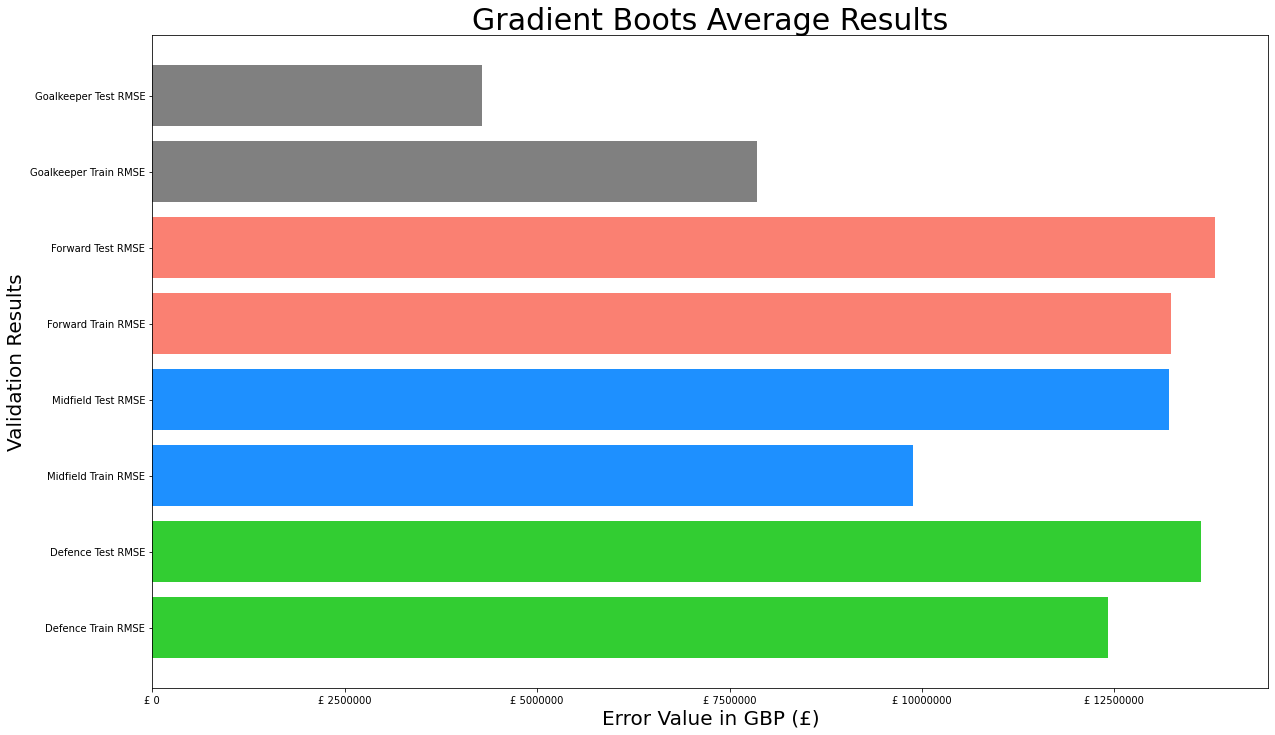

In [60]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,int(max([max(results_att['Avg RMSE']),max(results_mid['Avg RMSE']),max(results_def['Avg RMSE'])])+1000000),2500000))
y_ticks = [1,2,3,4,5,6,7,8]
y_ticks = [1,2,3,4,5,6,7,8]
y_labels = ['Defence Train RMSE','Defence Test RMSE',
            'Midfield Train RMSE','Midfield Test RMSE',
            'Forward Train RMSE','Forward Test RMSE',
            'Goalkeeper Train RMSE','Goalkeeper Test RMSE']

#Defence Results
def_train_pos = 1
def_train = results_def.iloc[0][1]
ax.barh(def_train_pos,def_train,color='limegreen')

def_test_pos = 2
def_test = results_def.iloc[1][1]
ax.barh(def_test_pos,def_test,color='limegreen')

#Midfield Results
mid_train_pos = 3
mid_train = results_mid.iloc[0][1]
ax.barh(mid_train_pos,mid_train,color='dodgerblue')

mid_test_pos = 4
mid_test = results_mid.iloc[1][1]
ax.barh(mid_test_pos,mid_test,color='dodgerblue')

#Attack Results
att_train_pos = 5
att_train = results_att.iloc[0][1]
ax.barh(att_train_pos,att_train,color='salmon')

att_test_pos = 6
att_test = results_att.iloc[1][1]
ax.barh(att_test_pos,att_test,color='salmon')

#Goalkeeper Results
att_train_pos = 7
att_train = results_gk.iloc[0][1]
ax.barh(att_train_pos,att_train,color='grey')

att_test_pos = 8
att_test = results_gk.iloc[1][1]
ax.barh(att_test_pos,att_test,color='grey')


#Labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Gradient Boots Average Results',fontsize=30)